In [1]:
import pandas as pd
import numpy as np
train=pd.read_csv("Train.csv")

In [2]:
test=pd.read_csv("Test.csv")

In [3]:

y_train=np.array(train.target)
y_test=np.array(test.target)


In [4]:
train=np.array(train)
test=np.array(test)
x_train=np.array(train[:,:5])
x_test=np.array(test[:,:5])

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[29.68187118 92.66247759  8.28062089 44.76773522  2.51916121]
4.990966735574959


In [7]:
print("training score is %0.4f"%lr.score(x_train,y_train))
print("training score is %0.4f"%lr.score(x_test,y_test))

training score is 0.9661
training score is 0.9691


# 1 features
it is 5

In [8]:
## 2.gradient descent 

In [9]:
import numpy as np

In [10]:
def needed_x(x_train,i):
    X=(x_train[i,:])
    X.reshape((-1,1))
    return(X)


In [11]:
y_train=np.array(y_train)
x_train=np.array(x_train)

In [12]:
def hypothesis(theta,x_train,i):
    X=needed_x(x_train,i) 
    theta=np.transpose(theta)
    return(np.dot(theta,X))
        
        

In [13]:
def gradient(theta,y_train,x_train,j):
    m=x_train.shape[0]
    grad=0.0
    for i in range(m):
        grad+=(hypothesis(theta,x_train,i)-y_train[i])*x_train[i][j]
    return(grad)
    
    

In [14]:
def error(theta,x_train,y_train):
    m=x_train.shape[0]
    loss=0
    for i in range(m):
        hyp=hypothesis(theta,x_train,i)
        loss+=(hyp-y_train[i])**2
    return(loss*0.5)

In [15]:
p=[4,3,2,1,9]
print(error(p,x_train,y_train))




9137038.34878661


In [16]:
def grad_inter(theta,y_train,x_train):
    m=x_train.shape[0]
    grad=0.0
    for i in range(m):
        grad+=(y_train[i]-hypothesis(theta,x_train,i))
    return(grad)

In [17]:
def gradientdescent(x_train,y_train,learning_rate=0.001):
    theta=np.zeros((5,))
    m=x_train.shape[0]
    inter=0
    err=[]
    temp=error(theta,x_train,y_train)
    error_change=temp
    while(error_change>0.0001):        
        for j in range(5):
            grad=gradient(theta,y_train,x_train,j)
            theta[j]=theta[j]-learning_rate*grad
        inter=inter-learning_rate*grad_inter(theta,y_train,x_train)
        error_change=temp-error(theta,x_train,y_train)
        temp=error(theta,x_train,y_train)
        err.append(temp)
    return theta,inter,err
    

In [23]:
ftheta,finter,error=gradientdescent(x_train,y_train)
print(ftheta)
print("final intercept is %0.4f"%(finter))

TypeError: 'list' object is not callable

In [19]:
import matplotlib.pyplot as plt

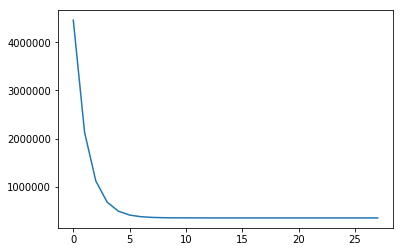

In [20]:
plt.plot(error)
plt.show()

In [21]:
def coeffofdet(x_train,y_train,ftheta):
    m=x_train.shape[0]
    upp=0
    low=0
    for i in range(m):
        upp+=(y_train[i]-hypothesis(ftheta,x_train,i))**2
        low+=(y_train[i]-y_train.mean())**2
    coeff=1-(upp/low)
    return coeff 

In [22]:
print(type(error))

<class 'list'>
